In [22]:
import numpy as np
correlations = np.load("./correlations.pkl.npy")
check = np.load("./check.pkl.npy")

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

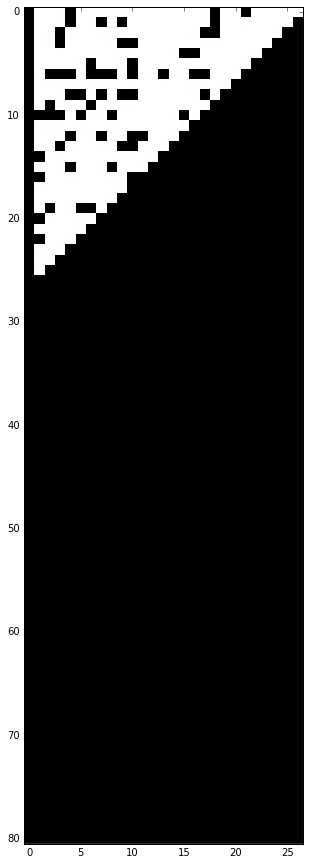

In [24]:
# GPU correlations (symptomatic that the first diagonals (8-blocks) are 0 (== black) always
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(correlations, cmap="gray", interpolation="none")

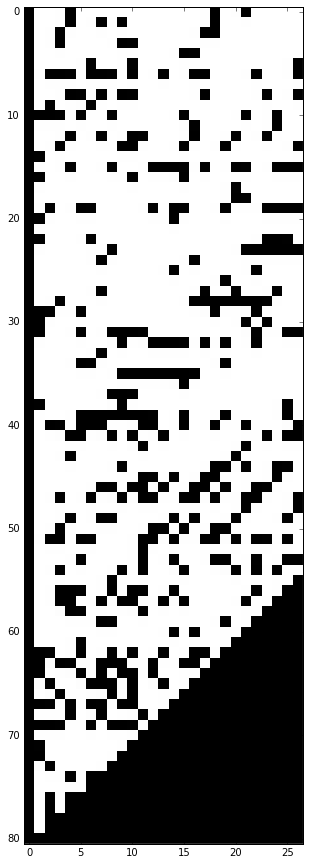

In [25]:
# Ground truth (seems wrong...diagonal not white == 1)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check, cmap="gray", interpolation="none")

In [26]:
check.shape

(81, 27)

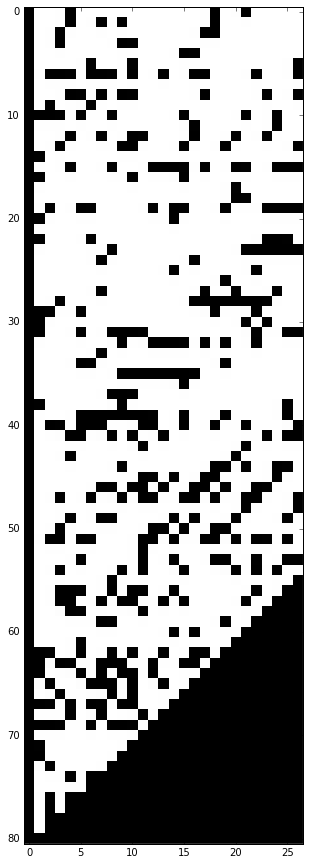

In [30]:
# let's do it again, recalculate ground truth 
# 54 is the last row where there is a "full==27" sliding window to check in the future (54+27=81). 
# That's why there is black triangle at the bottom. In a continuous sliding window, this wouldn't be there
# This is with N=81, sliding window = 27. Block_size=9 (3x3)
x = np.load("./x.pkl.npy")
y = np.load("./y.pkl.npy")
z = np.load("./z.pkl.npy")
ct = np.load("./ct.pkl.npy")
check1 = np.zeros_like(correlations)
sliding_window = check1.shape[1]
for i in range(check1.shape[0]):
    for j in range(i , min(sliding_window + i, check1.shape[0])):
            if (ct[i]-ct[j])**2 < (x[i]-x[j])**2  + (y[i] - y[j])**2 + (z[i] - z[j])**2:
                check1[i, j-i] = 1
                
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check1, cmap="gray", interpolation="none")

In [28]:
N = check.shape[0]
np.abs(check - check1).max()

0

In [33]:
x

array([ 0.97017699,  0.57123941,  0.67602563,  0.30277026,  0.98815268,
        0.43358839,  0.32359293,  0.61455637,  0.88505524,  0.02158766,
        0.50641167,  0.23820475,  0.45836371,  0.32237232,  0.15068413,
        0.33208233,  0.72376853,  0.75640833,  0.78016841,  0.84829146,
        0.96342617,  0.95662045,  0.52349955,  0.34716976,  0.7211467 ,
        0.61276096,  0.73713589,  0.24561839,  0.51231432,  0.4010382 ,
        0.14547414,  0.4806866 ,  0.22363585,  0.94474691,  0.6271382 ,
        0.33465868,  0.21609071,  0.94582766,  0.80412889,  0.53642809,
        0.98134422,  0.16496105,  0.80194432,  0.98547333,  0.36878052,
        0.61356074,  0.37228808,  0.81262898,  0.19967021,  0.00599403,
        0.62438226,  0.20429622,  0.95579982,  0.47933137,  0.12944876,
        0.88682175,  0.4172889 ,  0.1439169 ,  0.75706136,  0.5329569 ,
        0.16144143,  0.52429235,  0.69154423,  0.65490443,  0.11345956,
        0.30500206,  0.4377296 ,  0.50019485,  0.71046752,  0.62

In [34]:
y

array([  7.82699943e-01,   7.04868078e-01,   6.68185234e-01,
         6.92640617e-02,   8.61655354e-01,   8.00720096e-01,
         3.89941007e-01,   8.61483097e-01,   5.27626336e-01,
         9.63312030e-01,   8.13285530e-01,   7.94015050e-01,
         4.29890603e-01,   4.67200339e-01,   5.97814977e-01,
         5.67350090e-01,   9.66014192e-02,   3.33066136e-01,
         9.04498219e-01,   4.87905920e-01,   9.47839439e-01,
         7.92614520e-01,   5.26680887e-01,   6.05166793e-01,
         1.96744308e-01,   5.47722936e-01,   2.11753491e-02,
         9.62768197e-01,   4.56210762e-01,   4.15561110e-01,
         4.05611545e-01,   1.16151191e-01,   2.54307389e-01,
         2.35904038e-01,   5.68078339e-01,   8.71000528e-01,
         2.48320892e-01,   2.19253913e-01,   8.77253771e-01,
         5.94700992e-01,   1.56718150e-01,   2.75348306e-01,
         2.38893554e-01,   3.19080412e-01,   9.11899388e-01,
         4.96870607e-01,   5.64349174e-01,   7.61035085e-01,
         7.55432010e-01,

In [10]:
import numpy as np
np.where(x==0.82403624)

(array([], dtype=int64),)

In [113]:
np.where(x==0.81775689)

(array([8]),)

In [114]:
y[8:16]

array([ 0.49462005,  0.13737926,  0.63217103,  0.88951969,  0.95967758,
        0.93269199,  0.01922691,  0.11102214], dtype=float32)

In [84]:
y[24:]

array([ 0.86980486,  0.95739377,  0.45722562,  0.24933068,  0.79062432,
        0.41660839,  0.2160219 ,  0.20491999,  0.89854044,  0.18462023,
        0.29852843,  0.35963443,  0.6159724 ,  0.72406787,  0.88663906,
        0.8957932 ,  0.95089775,  0.81628722,  0.38464957,  0.09199598,
        0.84929907,  0.89802736,  0.47384384,  0.32334676,  0.68980533,
        0.55929697,  0.85717803,  0.43673065,  0.53199059,  0.61012739,
        0.35549074,  0.21740046,  0.72848731,  0.23121756,  0.0925628 ,
        0.69927949,  0.2881934 ,  0.51331192,  0.0060772 ,  0.86945933], dtype=float32)

In [85]:
z[24:]

array([ 0.19824067,  0.71382284,  0.06260016,  0.73668307,  0.11869724,
        0.11193934,  0.72747481,  0.46255267,  0.81613207,  0.77432835,
        0.20919167,  0.93272632,  0.14098145,  0.77419633,  0.80323517,
        0.90561998,  0.7683695 ,  0.97668117,  0.78336018,  0.56513208,
        0.13854954,  0.80031669,  0.46786216,  0.97926974,  0.51297593,
        0.30397162,  0.32215321,  0.13564816,  0.71447772,  0.33202007,
        0.29784349,  0.80185348,  0.31685761,  0.11355828,  0.39447027,
        0.69777393,  0.06081379,  0.44030124,  0.90970933,  0.02768658], dtype=float32)

In [138]:
y.shape

(81,)

In [139]:
ct.shape

(81,)